\# Tech Challenge - FIAP: IA para Devs (Fase 1)

###Grupo 38
- Pedro Vianna Silveira
- Rafael Silva Souza
- Rodrigo de Freitas Ornellas


---

### 🔗 Código Github



https://github.com/rafael2mind/tech-challenge-fase-1


### 🔗 Vídeo de apresentação
https://youtu.be/hHWkgkJ76sE   

---

## 1. Introdução

### 1.1. Descrição do Problema

O aumento dos custos de saúde é uma preocupação global que afeta indivíduos e empresas. As seguradoras de saúde, em particular, enfrentam o desafio de prever os custos médicos de seus segurados para precificar seus produtos de forma justa e competitiva, além de garantir a sustentabilidade financeira. Para abordar essa questão, é essencial desenvolver modelos preditivos que possam estimar os custos médicos individuais com base em diversas características dos segurados.

### 1.2. Objetivo do Projeto

O objetivo deste projeto é desenvolver um modelo preditivo de regressão para prever os custos médicos individuais cobrados pelo seguro de saúde. A base de dados fornecida contém informações demográficas e comportamentais dos segurados, como número de filhos, se é fumante, região e os encargos médicos.

### 1.3. Metodologia

Para atingir nosso objetivo, seguiremos um conjunto estruturado de etapas, que incluem:

1. **Exploração de Dados**:
   - Carregar a base de dados e explorar suas características.
   - Analisar estatísticas descritivas e visualizar distribuições relevantes.

2. **Pré-processamento de Dados**:
   - Realizar a limpeza dos dados, tratando valores ausentes (se necessário).
   - Converter variáveis categóricas em formatos adequados para modelagem.

3. **Modelagem**:
   - Criar um modelo preditivo de regressão utilizando uma técnica à nossa escolha (por exemplo, Regressão Linear, Árvores de Decisão, etc).
   - Dividir o conjunto de dados em conjuntos de treinamento e teste.

4. **Treinamento e Avaliação do Modelo**:
   - Treinar o modelo com o conjunto de treinamento.
   - Avaliar o desempenho do modelo utilizando métricas como MAE, RMSE e R².

5. **Validação Estatística**:
   - Utilizar métricas estatísticas para validar a eficácia do modelo (p-value, intervalos de confiança).

6. **Apresentação dos Resultados**:
   - Apresentar resultados visuais, como gráficos de previsões vs. valores reais.
   - Elaborar um relatório que inclua uma análise dos resultados, insights obtidos e validação estatística.

### 1.4. Resultados Esperados

Esperamos que o modelo seja capaz de fazer previsões confiáveis dos custos médicos individuais com base nas características fornecidas. O sucesso do modelo será medido pela precisão das previsões em relação aos valores reais, avaliada por meio das métricas de erro mencionadas anteriormente. Além disso, o relatório final deve proporcionar uma compreensão clara dos fatores que influenciam os custos médicos, bem como possíveis melhorias para o modelo.

### 1.5. Estrutura do Notebook

O notebook será estruturado da seguinte maneira:

1. **Introdução**: Explicação do problema, objetivos e metodologia.
2. **Exploração de Dados**: Carregamento e análise descritiva dos dados.
3. **Pré-processamento de Dados**: Limpeza e transformação dos dados.
4. **Modelagem**: Criação e treinamento do modelo preditivo.
5. **Avaliação do Modelo**: Avaliação do desempenho do modelo.
6. **Validação Estatística**: Verificação da significância dos resultados.
7. **Apresentação dos Resultados**: Visualização e interpretação dos resultados.
8. **Conclusão**: Discussão dos resultados e considerações finais.

---

## 2. Exploração de Dados

### 2.1. Carregamento e Visualização Inicial

Nesta seção, carregaremos a base de dados e exploraremos suas características básicas.

In [ ]:
# Código para carregar o dataset
import pandas as pd

# Carregar o dataset
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### 2.2. Análise Descritiva

Analisaremos estatísticas descritivas e visualizaremos distribuições relevantes.

In [ ]:
# Código para análise descritiva, verificando quantidade de valores nulos,
# tipos de dados e informações estatísticas
print(df.describe(), "\n")
print(df.info(), "\n")

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: fl

Analisando os dados, foi possível perceber que não havia dados nulos. Optamos por não executar o comando df.dropna(), pois para o contexto atual não se aplicaria.

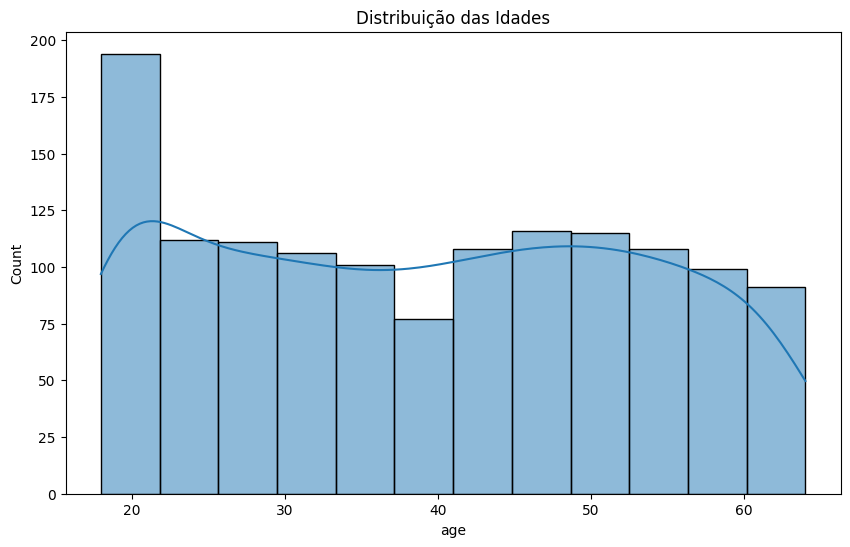

In [ ]:
# Visualização das distribuições
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma das idades
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True)
plt.title('Distribuição das Idades')
plt.show()

Seguimos para avaliação da distribuição dos dados da base.

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'charges'}>]], dtype=object)

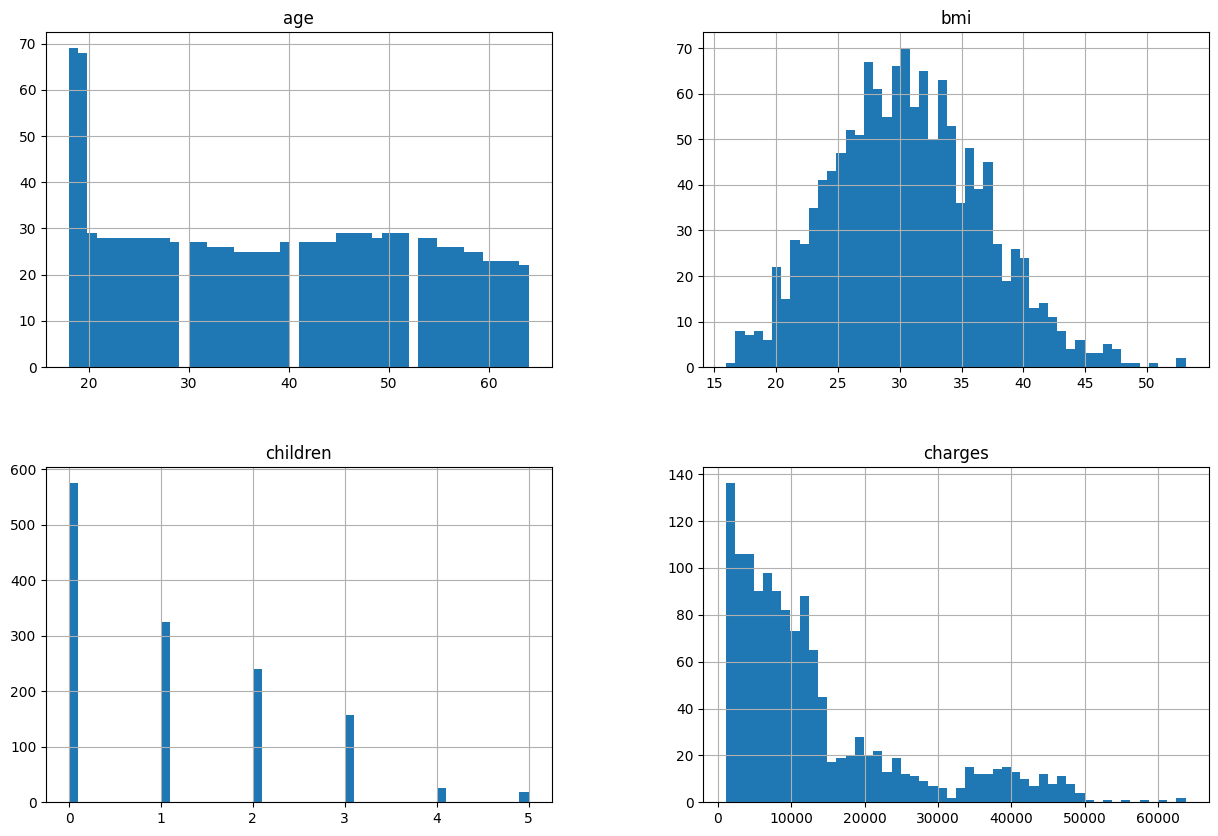

In [ ]:
# Verificando a distribuicao dos dados

%matplotlib inline
import matplotlib.pyplot as plt
df.drop(['sex', 'region'], axis=1).hist(bins=50, figsize=(15,10))

Foi possível perceber que a distribuição dos dados referente a idade estavam normais, com exceção do caso de cliente com menos de 20 anos. O BMI está fazendo uma curva semelhante a uma curva gaussiana, com alguns possíveis outliers no lado direito do gráfico.

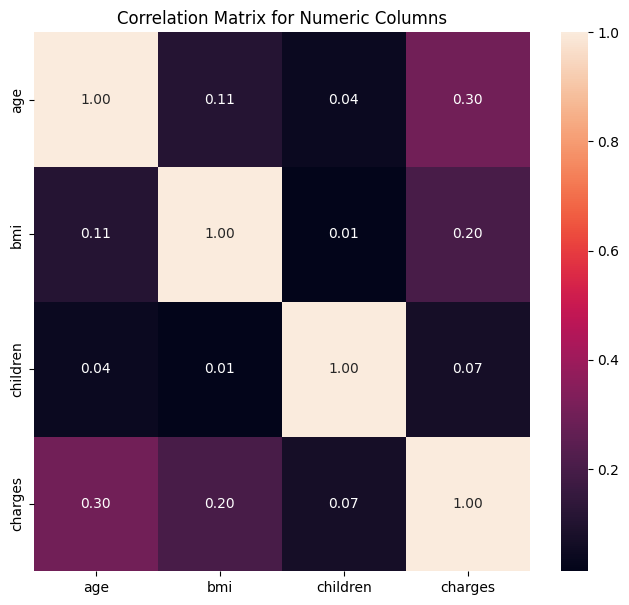

In [ ]:
# Printando grafico de correlacao

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 7))
sns.heatmap(df.drop(['sex', 'smoker', 'region'], axis=1).corr(), annot=True, fmt='.2f')
plt.title('Correlation Matrix for Numeric Columns')
plt.show()

Notamos alguma correlação entre as colunas age x BMI x children com a coluna charges (target).

Entretanto, não há uma grande correlação entre as outras variáveis.

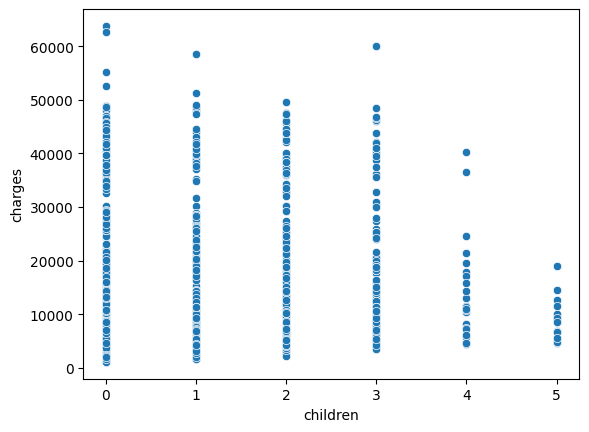

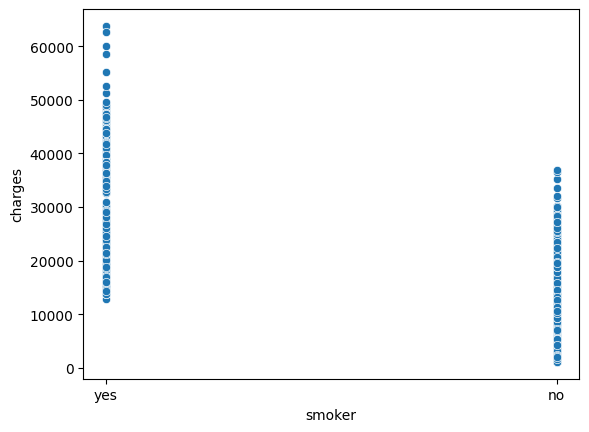

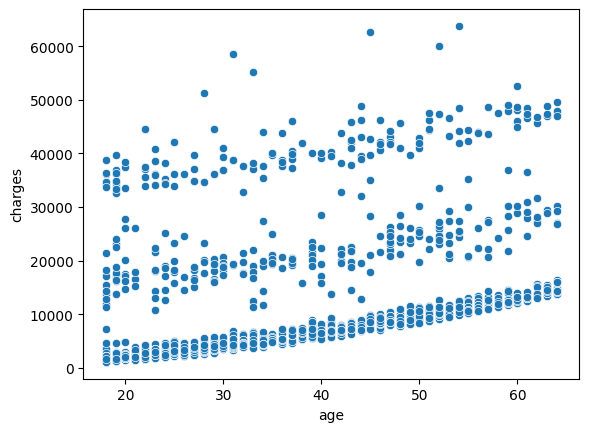

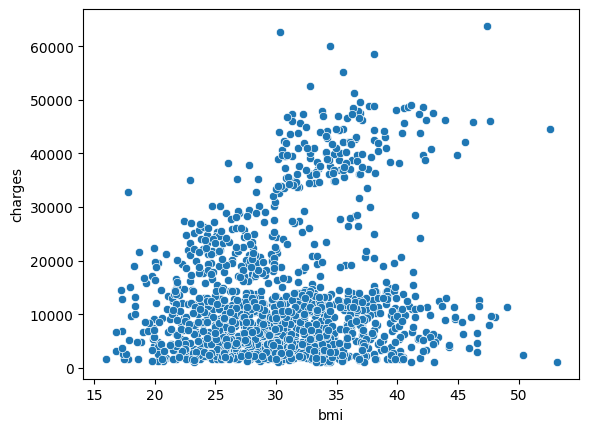

In [ ]:
# Criando scatterplot para verificar proporção Charges x Children
sns.scatterplot(data=df, x="children", y="charges")
plt.show()

sns.scatterplot(data=df, x="smoker", y="charges")
plt.show()

sns.scatterplot(data=df, x="age", y="charges")
plt.show()

sns.scatterplot(data=df, x="bmi", y="charges")
plt.show()



Em análise, percebemos nos diversos gráficos, algum tipo de correlação entre charges e outras variáveis. Aparentemente:


*   Há menos encargos quando se tem mais filhos;
*   Há mais encargos quando se é fumante;
*   Quanto maior a idade, maior seriam os encargos;
*   Quanto maior o BMI, de forma geral há maiores máximos alcançados.

Mesmo considerando que há a presença de outliers, foram estes os pontos observados.

Observação: Realizamos tentativas de agrupar os dados da coluna children e age de diferentes formas, na tentativa de obter melhores resultados. Porém as tentativas não foram bem sucedidas.


In [ ]:
#df["children_group"] = pd.cut(df["children"], bins=[-1, 3, 1000], labels=["0 a 3","4+"])
#set(df['children_group'])

---

##3. Pré-processamento de Dados
##3.1. Limpeza de Dados
Vamos tratar valores ausentes e remover outliers, se necessário (a remoção de outliers foi removida pois não apresentou um bom resultado).

In [ ]:
# Código para tratamento de valores ausentes
df.isnull().sum()

# Tratamento de outliers (se necessário)
# Exemplo: Removendo outliers baseados no IQR
#num_cols = df.select_dtypes(include=['float64', 'int64']).columns
#Q1 = df[num_cols].quantile(0.25)
#Q3 = df[num_cols].quantile(0.75)
#IQR = Q3 - Q1
#df = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

##3.2. Conversão de Variáveis Categóricas
Transformaremos variáveis categóricas para um formato adequado para modelagem (mantivemos o one-hot encoding pois ele apresentou um resultado melhor).

In [ ]:
# Código para conversão de variáveis categóricas
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])
print(df.head())

   age     bmi  children      charges  sex_female  sex_male  smoker_no  \
0   19  27.900         0  16884.92400        True     False      False   
1   18  33.770         1   1725.55230       False      True       True   
2   28  33.000         3   4449.46200       False      True       True   
3   33  22.705         0  21984.47061       False      True       True   
4   32  28.880         0   3866.85520       False      True       True   

   smoker_yes  region_northeast  region_northwest  region_southeast  \
0        True             False             False             False   
1       False             False             False              True   
2       False             False             False              True   
3       False             False              True             False   
4       False             False              True             False   

   region_southwest  
0              True  
1             False  
2             False  
3             False  
4             Fals

___

##4. Modelagem
###4.1. Divisão dos Dados
Dividiremos o conjunto de dados em conjuntos de treinamento e teste (escolhemos o StandardScaler pois não houve diferença para o o MinMaxScaler).

In [ ]:
# Código para divisão dos dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('charges', axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stdScaler = StandardScaler()

X_train_scaled = stdScaler.fit_transform(X_train)

X_test_scaled = stdScaler.transform(X_test)

##4.2. Treinamento do Modelo
Criaremos e treinaremos o modelo preditivo de regressão.

In [ ]:
# Código para treinamento do modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

___

##5. Treinamento e Avaliação do Modelo
###5.1. Avaliação do Desempenho
Utilizaremos métricas como RMSE, MAE e R² para avaliar a performance do modelo.

In [ ]:
# Código para avaliação do modelo
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 4179.152127556641
RMSE: 5800.855200042346
R²: 0.7832515555617187


___

##6. Validação Estatística
###6.1. Intervalos de Confiança e P-values
Calcularemos intervalos de confiança e p-values para validar a significância dos resultados. Adicionamos um trecho para ajudar a identificar as colunas relacionadas ao p-value, e ordenamos por relevância.

In [ ]:
import statsmodels.api as sm
import numpy as np

# Adicionar constante para o modelo de statsmodels
X_train_sm = sm.add_constant(X_train_scaled)

# Ajustar o modelo de regressão
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Obter os p-valores
p_values = model_sm.pvalues

# Criar um DataFrame com os nomes das colunas e seus respectivos p-valores
p_values_df = pd.DataFrame({
    'Feature': ['const'] + X.columns.tolist(),
    'p-value': p_values
})

# Ordenar por p-valores em ordem crescente
p_values_df_sorted = p_values_df.sort_values(by='p-value')

# Imprimir o resumo do modelo
print(model_sm.summary())

# Mostrar os p-valores ordenados
print(p_values_df_sorted)

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.740
Method:                 Least Squares   F-statistic:                     380.9
Date:                Tue, 28 May 2024   Prob (F-statistic):          1.32e-305
Time:                        01:39:12   Log-Likelihood:                -10845.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1061   BIC:                         2.175e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.442     71.201      0.0

Realizamos uma nova execução, agora apenas com as features com p-value abaixo de 0.05. Obtivemos o mesmo resultado com as menos colunas. Vamos manter apenas essas colunas no modelo.

In [ ]:
# testando com as colunas mais relevantes

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df.drop(['charges','region_southeast','region_northwest','sex_male','sex_male'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

stdScaler = StandardScaler()

X_train_scaled = stdScaler.fit_transform(X_train)

X_test_scaled = stdScaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

MAE: 4179.714049167456
RMSE: 5807.444660470009
R²: 0.7827588466562849


Com base nas observações da falta de correlacao entre as variaveis não target, encontramos a biblioteca de **polynomial features**, que faz combinações entre features para extrair relacoes mais complexas e tivemos um bom resultado - *alcançamos quase **84%** de acerto*.

Para manter um melhor controle do fluxo, utilizamos um **pipeline** para aplicar o scaling e criar as polynomial features.


In [ ]:
# com base nas observações da falta de correlacao entre as variaveis não target, tivemos encontramos a biblioteca de polynomial features, que faz combinações entre features para extrair relacoes mais complexas

from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

X=df.drop(['charges','region_southeast','region_northwest','sex_male','sex_male'], axis=1)
y=df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), LinearRegression())

# Aplicando validação cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Treinando o modelo
pipeline.fit(X_train, y_train)

print(pipeline.get_feature_names_out)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Avaliando o modelo
print("Score de validação cruzada:", scores)
print("Score médio de validação cruzada:", scores.mean())
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])>
Score de validação cruzada: [0.83488746 0.86303889 0.84297819 0.79755223 0.85899059]
Score médio de validação cruzada: 0.839489472817401
MSE: 26623912.21872279
MAE: 3041.1575604850746
R2: 0.8335836779131103


Obtivemos resultados ainda melhores com o RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures,OneHotEncoder
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import make_pipeline

X=df.drop(['charges','region_southeast','region_northwest','sex_male','sex_male'], axis=1)
y=df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

pipeline = make_pipeline(StandardScaler(), PolynomialFeatures(degree=2), RandomForestRegressor(n_estimators=100, random_state=42))

# Aplicando validação cruzada
scores = cross_val_score(pipeline, X_train, y_train, cv=5)

# Treinando o modelo
pipeline.fit(X_train, y_train)

print(pipeline.get_feature_names_out)

y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Avaliando o modelo
print("Score de validação cruzada:", scores)
print("Score médio de validação cruzada:", scores.mean())
print('MSE:', mse)
print('MAE:', mae)
print('R2:', r2)

<bound method Pipeline.get_feature_names_out of Pipeline(steps=[('standardscaler', StandardScaler()),
                ('polynomialfeatures', PolynomialFeatures()),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])>
Score de validação cruzada: [0.81503274 0.86667618 0.84302048 0.7871534  0.83894641]
Score médio de validação cruzada: 0.8301658421017818
MSE: 24622883.61668854
MAE: 2837.419780138551
R2: 0.8460913746635162


___

##7. Apresentação dos Resultados
###7.1. Visualização dos Resultados
Apresentaremos os gráficos de previsões vs. valores reais e outros gráficos relevantes.

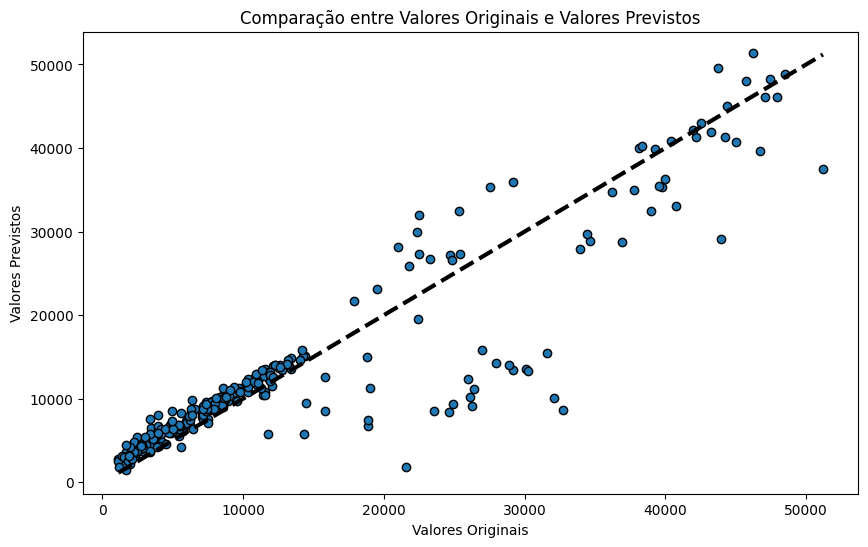

In [ ]:
# Código para visualização dos resultados
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Valores Originais')
plt.ylabel('Valores Previstos')
plt.title('Comparação entre Valores Originais e Valores Previstos')
plt.show()

___

##8. Conclusão
###8.1. Discussão dos Resultados

Em análise junto ao grupo:



*   Estruturamos todo o processo para obtenção, análise e exploração dos dados.
*   Fizemos o uso de bibliotecas que possibilitassem a visualização descritiva e em gráficos para melhor percepção de padrões e características da base.
*   Ao realizar as primeiras análises, foi possível perceber com base em correlações que children, BMI e age poderiam ser consideradas no modelo.
*   Realizamos a preparação dos dados, separando da base o que viria a ser utilizado para treino e testes, assim como escalar.
*   Após progredir com o treino do modelo, pudemos avaliar o desempenho do modelo, chegando no resultado de 84%.
*   O gráfico final de Previsões vs. Valores reais mostra como o modelo consegue projetar enfim os valores de custos médicos com base nas características que estavam à disposição.



###8.2. Considerações Finais
Com o projeto, conseguimos aplicar de forma prática muitos dos diversos conceitos relevantes abordados nesta fase, como:

*   Conceitos básicos de data science: Extração, preparação e análise de dados, utilizando bibliotecas para criação de gráficos conversão de variáveis categóricas, entre outros.
*   Análise exploratória dos dados: investigação com busca de padrões, características e correlações relevantes para o objetivo.
*   Modelagem: criação de modelo utilizando regressão linear, utilizando parte do dataset para treino e outra para testes.
*   Validação: validação de desempenho



